<a href="https://colab.research.google.com/github/Manasa-01/cs666student/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

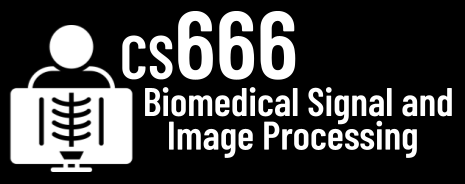
#Assignment 5

In [ ]:
# NAME: Manasa Kone

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [ ]:
# load numpy and matplotlib
%pylab inline   

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.5 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [ ]:
# TODO: 220 slices

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

IN 2D :

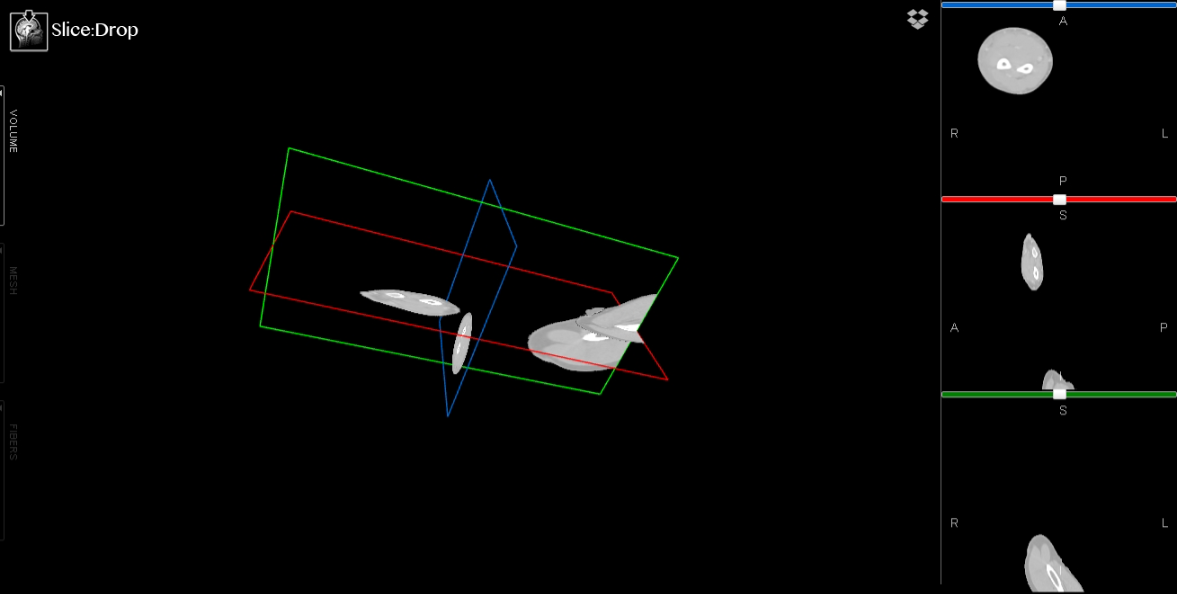

IN 3D:

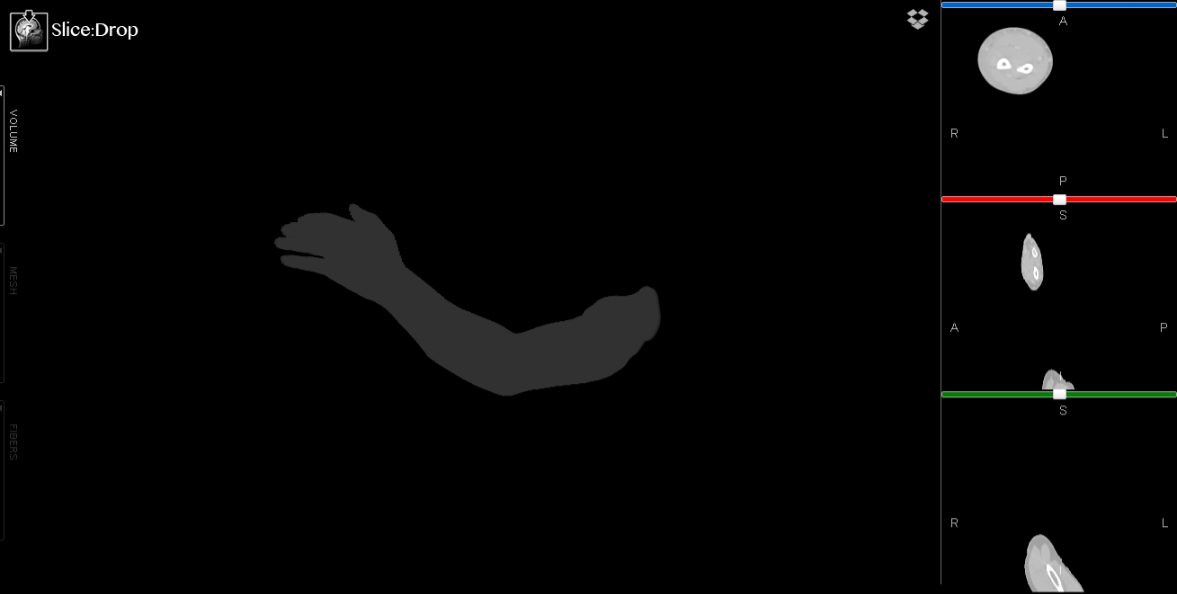

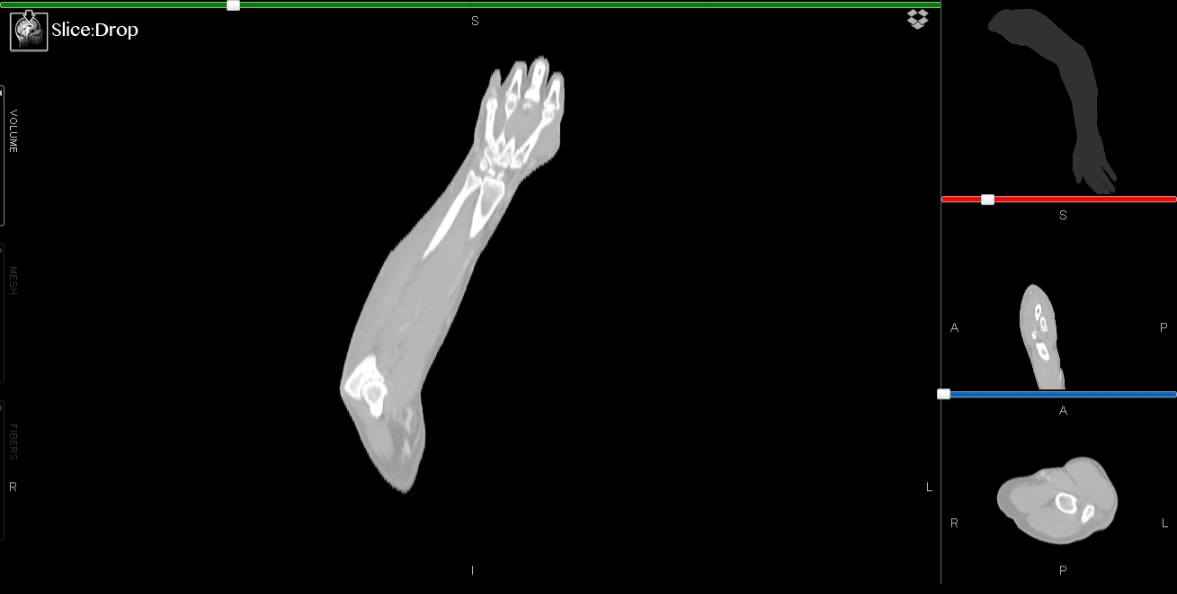

In [ ]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

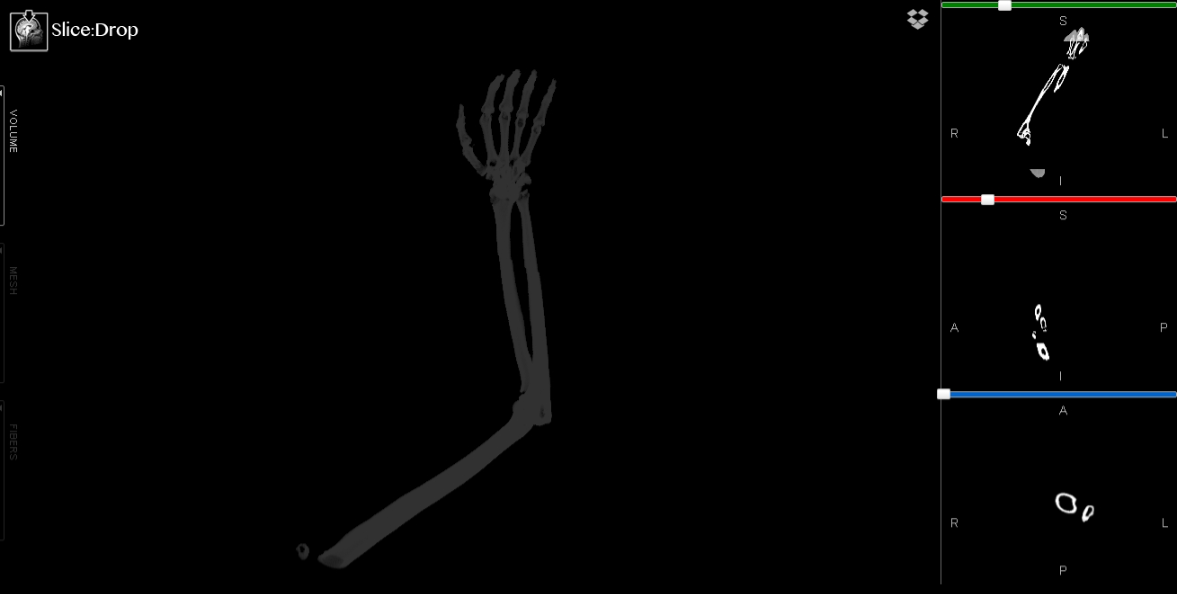

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [ ]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [ ]:
from pydicom import dcmread

In [ ]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

In [ ]:
import numpy as np
import os
import pydicom

path = "/content/ct"

# Get a list of all DICOM files in the directory
ct_files = os.listdir(path)

# Sort the list of files to ensure correct ordering
ct_files.sort()

slices = []
# Loop through all DICOM files and store the slices in a list
for ct_file in ct_files:
    data = pydicom.dcmread(os.path.join(path, ct_file))
    if hasattr(data, 'SliceLocation'):
        slices.append(data)

# Sort the slices by their location
slices = sorted(slices, key=lambda s: s.SliceLocation)

# Get the dimensions of the CT scan
rows = int(slices[0].Rows)
cols = int(slices[0].Columns)
slices_num = len(slices)

# Create an empty 3D numpy array to store the CT scan data
volume3d = np.zeros((rows, cols, slices_num), dtype=np.float32)

# Loop through all slices and store the pixel arrays in the numpy array
for i, s in enumerate(slices):
    image2D = s.pixel_array
    volume3d[:, :, i] = image2D.astype(np.float32)

# Print the shape of the resulting 3D numpy array
print(volume3d.shape)


(454, 512, 220)


In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

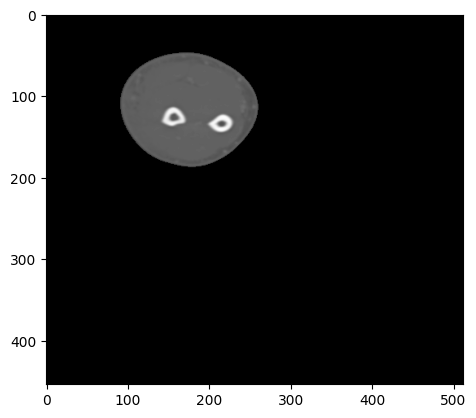

In [ ]:
# TODO: YOUR CODE FOR AXIAL
import matplotlib.pyplot as plt
i= 120
plt.imshow(volume3d[:,:,i], cmap='gray')
plt.show()

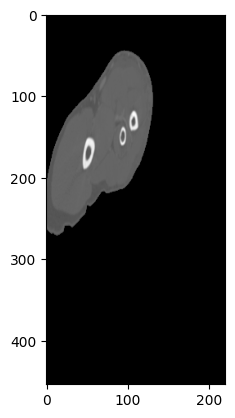

In [ ]:
# TODO: YOUR CODE FOR SAGITTAL

plt.imshow(volume3d[:, i, :], cmap='gray')
plt.show()


# # Show sagittal slices
# fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
# for i in range(25):
#     axs[i//5, i%5].imshow(ct_scan[:, i, :], cmap='gray')
#     axs[i//5, i%5].axis('off')
# plt.show()



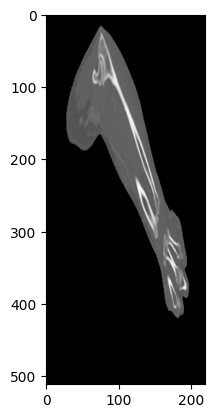

In [ ]:
# TODO: YOUR CODE FOR CORONAL

# # Show coronal slices
# fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
# for i in range(25):
#     axs[i//5, i%5].imshow(ct_scan[:, :, i], cmap='gray')
#     axs[i//5, i%5].axis('off')
# plt.show()

plt.imshow(volume3d[i, :, :], cmap='gray')
plt.show()


In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(25):
    axs[i//5, i%5].imshow(volume3d[:, :, i], cmap='gray')
    axs[i//5, i%5].axis('off')
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(25):
    axs[i//5, i%5].imshow(volume3d[i, :, :], cmap='gray')
    axs[i//5, i%5].axis('off')
plt.show()


In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
for i in range(25):
    axs[i//5, i%5].imshow(volume3d[:, i, :], cmap='gray')
    axs[i//5, i%5].axis('off')
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

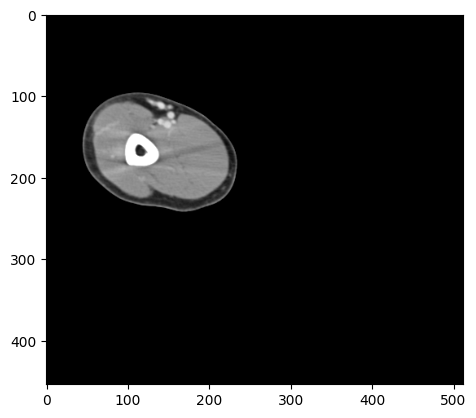

In [ ]:
slice_index = 53
slice_data = slices[slice_index]

window_center = slice_data.WindowCenter
window_width = slice_data.WindowWidth
rescale_intercept = slice_data.RescaleIntercept
rescale_slope = slice_data.RescaleSlope

# Compute the window/level boundaries
window_min = window_center - window_width/2
window_max = window_center + window_width/2

# Apply window/level adjustment to the slice data
hu_pixels = slice_data.pixel_array.astype(np.float32) * rescale_slope + rescale_intercept
windowed_slice = hu_pixels.copy()
windowed_slice[windowed_slice < window_min] = window_min
windowed_slice[windowed_slice > window_max] = window_max

# Display the slice with window/level adjustment
plt.imshow(windowed_slice, cmap='gray', vmin=window_min, vmax=window_max)
plt.show()

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

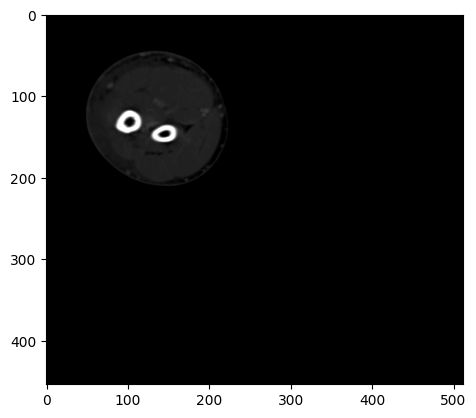

In [ ]:
# TODO: YOUR CODE

# Select a different slice index
slice_index = 100
slice_data = slices[slice_index]

# Compute the window/level boundaries
level = 500
window = 1200
vmin = level - window/2
vmax = level + window/2

# Apply window/level adjustment to the slice data
hu_pixels = slice_data.pixel_array.astype(np.float32) * rescale_slope + rescale_intercept
windowed_slice = hu_pixels.copy()
windowed_slice[windowed_slice < vmin] = vmin
windowed_slice[windowed_slice > vmax] = vmax

# Display the slice with window/level adjustment
plt.imshow(windowed_slice, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()



In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

The visualisation is improved in this example by setting the window value to 450 and the level value to 150.
 This makes sense because a distinction and differentiation have been formed.


**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [ ]:
# TODO: YOUR CODE TO SEGMENT FAT


In [ ]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

In [ ]:
# TODO: YOUR CODE TO SEGMENT BONES

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
# collaborated with datrika13


In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""